In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [2]:
with open('bsc-3m/traj_clustered.pkl', 'rb') as f:
    df = pickle.load(f)
with open('bsc-3m/traj_01_elab_new.pkl', 'rb') as f:
    frames = pickle.load(f)
    
df = df.join(frames['frames'])
df = df.loc[df['cluster'] != -1]

In [3]:
with open('bsc-3m/signal_lines_true.pickle', 'rb') as f:
    l_xy = pickle.load(f)

# map lights to clusters
# for n in range(24):
#     fig, ax = plt.subplots(figsize=(20,20))
#     im = Image.open("intersection2.png")
#     im = ImageOps.flip(im)
#     ax.set_xlim(0,1280)
#     ax.set_ylim(0,720)
#     ax.imshow(im, origin='lower')

#     mask = df['cluster'] == 0
#     s = df.loc[mask]
#     for _, row in s.iterrows():
#         ax.plot(row['xs'], row['ys'], c='b', alpha=0.05)
#     ax.plot(lights[n]['x'], lights[n]['y'], lw=20)
#     ax.set_title('number: ' + str(n))

In [4]:
light_dict = {
    0 : 7,
    1 : 6,
    2 : 5,
    3 : 9,
    4 : 8,
    5 : 6,
    6 : 10,
    7 : 6,
    8 : 4,
    9 : 4, 
    10 : 11,
    11 : 5
}

In [5]:
l_df = pd.read_csv('bsc-3m/signals_dense.csv')

In [6]:
def euc(x, y):
    v = np.vstack((x, y)).T
    distances = np.linalg.norm(v[:-1] - v[1:], axis=1)
    return distances

In [7]:
def get_mid(n):
    return np.array([sum(n['x'])/2, sum(n['y'])/2])

In [8]:
def d2l(x, y, mid):
    v = np.vstack((x, y)).T
    return np.linalg.norm(v - mid, axis=1)

In [9]:
d = {
    'x' : [],
    'y' : [],
    'euc' : [],
    'd_light' : [],
    'light_color' : [],
    'frames' : [],
    'class' : [],
    'cluster' : []
}

step_size = 1
for _, row in df.iterrows():
    rowx = np.array(row['xs'][::step_size])
    rowy = np.array(row['ys'][::step_size])
    frames = np.array(row['frames'][::step_size][:-1])
    l_mid = get_mid(l_xy[light_dict[row['cluster']]])
    
    d['x'].append(rowx[:-1])
    d['y'].append(rowy[:-1])
    d['light_color'].append(np.array([l_df.iloc[f][light_dict[row['cluster']]] for f in frames]))
    d['d_light'].append(d2l(rowx[:-1], rowy[:-1], l_mid))
    d['euc'].append(euc(rowx, rowy))
    d['frames'].append(frames)
    d['class'].append(row['class'])
    d['cluster'].append(row['cluster'])

pdf = pd.DataFrame(d)

In [11]:
with open('formatted.pkl', 'wb') as f:
    pickle.dump(pdf, f)

(array([290., 315., 191., 200., 769., 106., 123., 172., 386., 290., 971.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <BarContainer object of 11 artists>)

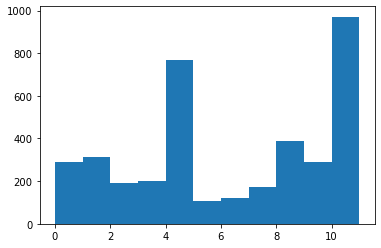

In [18]:
plt.hist(pdf['cluster'], bins=np.arange(12))